# Upscaling (aumento de escala?)
El tema de upscaling es importanet cuando veamos "encoders-decoders"

Hay muchas formas de "upscaling". Aca vamos a ver una minima parte.

Discutimos en clase:
* Nearest neighboard (el vecino mas cercano)
* Bilinear (para imagenes, tensores de rango 2)
* Transpose convolution (convolucion transpuesta)

Mas adelante comento sobre otras tantas que no discutimos aca.



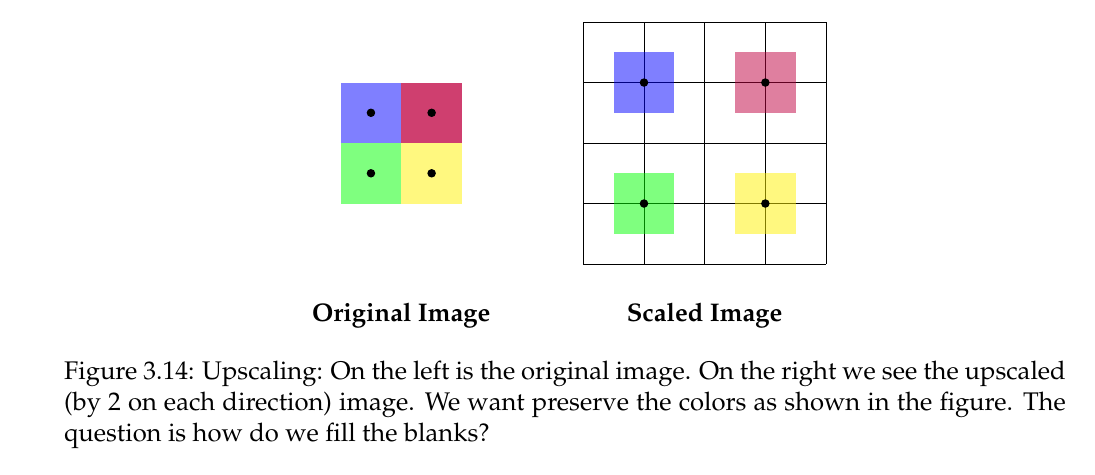

Mi intento por describir "upscaling" matematicamente. Asumamos unos datos (rango 2) y centrados en el origen. Los datos son de coordenadas $(x,y)$, el nuevo conjunto de datos (pixeles) tendra coordenadas $(sx, sy)$
donde $s=2$ o $s=3$, $s=n$. En la figura de arriba $s=2$.

Por ejemplo en la grafica el punto en localizacion $(1/2,1/3)$ on $s=2$
termina en $(1,1)$.

## Nearest neighbor (vecino mas cercano).
La idea de vecino mas cercano es tomar un punto $(x,y)$, por ejemplo
$(x,y)=(0.25, 1.5)$. De color debemos pintar ese punto? Miramos al color mas cercano que es el rojo.



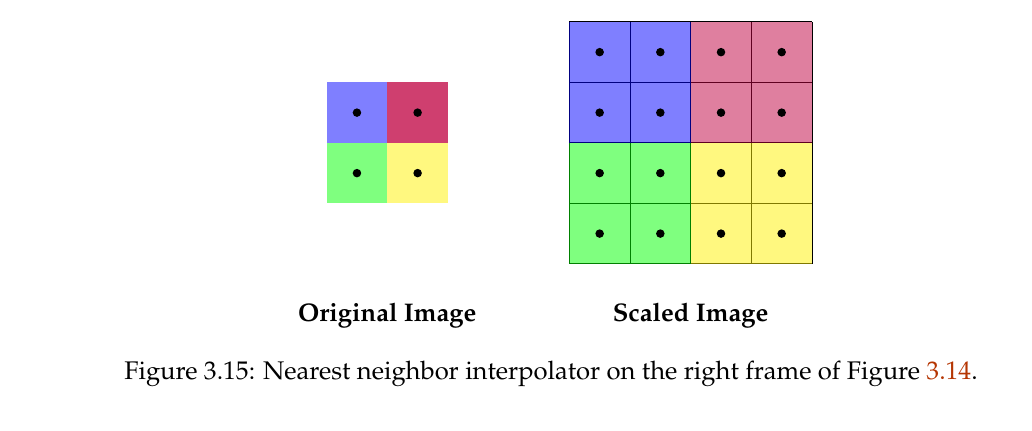

## Interpolacion bilineal.



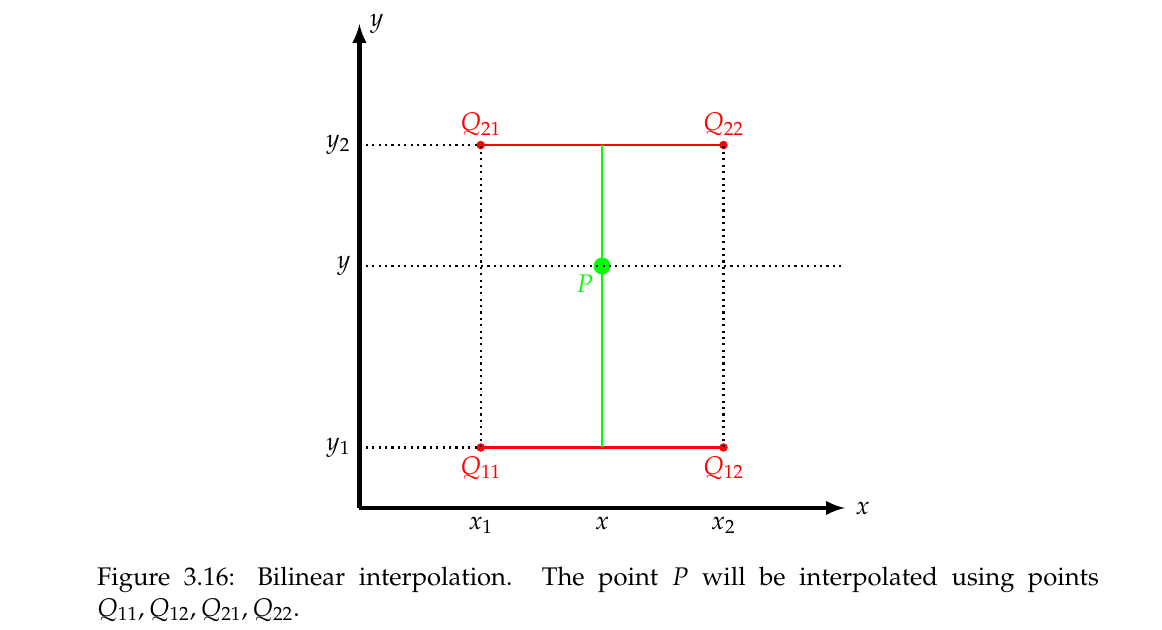

Asumamos que los datos tiene la forma de una funcion $f(x,y)$.
Miramos ordenadas $y_1$ (abajo), $y_2$ arriba. Interpolemos abajo.


$$ f(x, y_1) = \frac{x_2 -x}{x_2 - x_1} f(Q_{11}) + \frac{x -x_1}{x_2 - x_1} f(Q_{12}).$$

$$ f(x, y_2) = \frac{x_2 -x}{x_2 - x_1} f(Q_{21}) + \frac{x -x_1}{x_2 - x_1} f(Q_{22}).$$

Tenemos el valor de la funcion en $f(x,y_1)$ (abajo) y $f(x,y_2)$ arriba.

$f(x,y)$ es un promedio ponderado entre los dos puntos anteriores.

$$ f(x,y) = \frac{y_2 - y}{y_2 - y_1} f(x, y_1) + \frac{y-y_1}{y_2-y_1} f(x,y_2) .$$





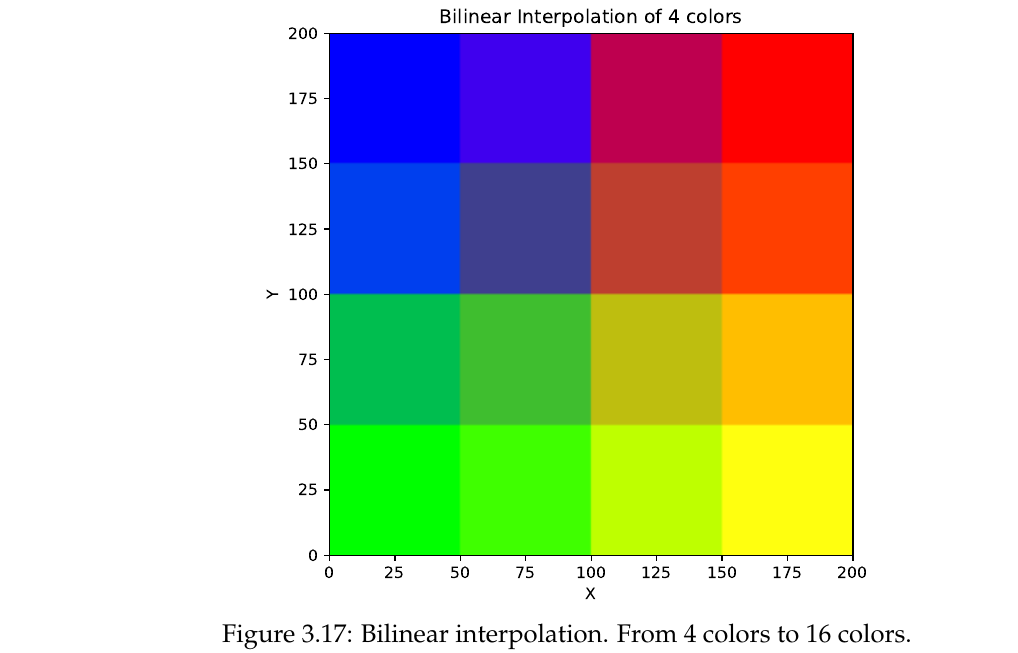

[este blog](https://unimatrixz.com/topics/ai-upscaler/upscaling-methods/#classical-upscalers-vs-ai-upscalers-key-differences)  describe dos tipos de "upscaling".

* Clasicos:
    * Nearest-Neighbor Interpolation
    * bilineal interpolation
    * bicubic interpolation
    * Lanzcos interpolation
    * Fourier transform

* AI upscaling
    * Stable difussion 4x
    * SRCNN: Super-resolution Convolutional Neural Networks
    * LapSRN: Laplacian Pyramid Super-resolution Network
    * SRGAN: Super-Resolution Generativa Adversary Networks
    * Deep Image Prior: Super-resolution Generativa Adversay Networks.

Esta el **transposed convolution** que es vamos a ver enseguida.

## Transposed Convolution
Un poco de teoria. Los "ignorantes" dicen que esto es "deconvolution".
Deconvolution es otra cosa.

Veamos que es **deconvolution**:

Se tienen unos datos $x$ y un filtro $y$, la salida de la convolucion esta dada por

$$ o = y*x .$$

La deconvolucion busca el filtro $y$ a partir de los datos. Se busca una funcion $x^{-1}$ (un operador) tal que

$$ y = o * x^{-1} $$
Si existe un inverso $x^{-1}$ tal que se de esta ecuacion, entonces
$y$ es la deconvolucion de la salida $o$ con el filtro inverso $x^{-1}$.

Piense en matrices

$y = A x$, $x = A^{-1} y$.

Vamos a ver en unos instantes que la convolucion, se puede ver como un producto de una matriz por los datos.











La idea detras de la convolucion inversa es que si nuestros datos de entrada son $n_i \times m_i$, y los de salida son $n_o \times m_o$,
y (generalmente)  $n_0>n_i$, $m_o > m_i$.
La idea de la convolucio transversa es recuperar las dimensiones perdidas, al costo que sea. Es decir, a la convolucion transversa entran datos de dimensiones $n_o \times m_o$ y la idea es que la salida de estos datos sea de dimensiones $n_i \times m_i$.

Por que la palabra **transposed convolution**?

Me toco estudiar y ver como la convolucion era un producto de una matriz por un vector. En este lenguaje la convolucion transpuesta es el producto de esta matriz transpuesta por el vector.

Veamos un ejemplo generico.

Supongamos que mis datos son un vector en $x \in \mathbb{R}^n$,

Que la convolucion se caracteriza por una matriz $A \in m \times n$

de forma que la convolucion seria un vector

$$ y = A x $$
$y \in \mathbb{R}^m$, la idea es que $m < n$ y el operador $A$ esta
reduciendo dimensiones.

El problema transpuesto es

$$ w = A^T y$$
$A^T \in \mathbb{R}^{n \times m}$, $w \in \mathbb{R}^n$.

La transpuesta de $A$, es decir $A^T$ es la inversa si $A$ es ortogonal
$A^T=A^{-1}$.

$w$ esta lejos de ser la recuperacion de $x$.

$$ x \implies y  \implies w=x' $$
pero $w=x'$ esta lejos de ser $x$.

### Convolucion vista como producto de una matriz por un vector

$$z_j = x_i \star y_i = \sum_{i=0}^{N_y - 1} y_j x_{i+j}
\quad , \quad j=0,1, \cdots, N_x - N_y .$$

El ultimo indice de $x$ es $i+j$, $N_x - N_y + N_y -1=N_x-1$
$ i+j=0,1, \cdots, N_x-1$

Podemos escribir esto de forma matricial como sigue


$Z = Y X$ como sigue


$m=N_x- N_y$, $n=N_x-1$
\begin{eqnarray}
\begin{pmatrix}
y_0 & y_1 & \cdots & y_m & 0 & \cdots & 0 \\
0 & y_0 & y_1 & \cdots & y_m & \ddots & \vdots  \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & \vdots & 0 & y_0 & y_1 & \cdots & y_m
\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}
=
\begin{pmatrix} z_0 \\ z_1 \\ \vdots \\ z_{N_x- N_y} \end{pmatrix}
\end{eqnarray}
A la matriz $Z$ se le llama
[Toeplitz](https://en.wikipedia.org/wiki/Toeplitz_matrix)
Segun eso $n=N_x$.

La pregunta es como extendenmos esto a tensores de rango 2?


$$z_{jk} = (x \star y)_{jk} = \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y-1} y_{mn} x_{m+j , n+k} .$$
$j=0,1, \cdots, M_x - M_y \quad , \quad k = 0,1, \cdots, N_x - N_y$.

Como podemos llevar esto a producto de matriz por vector datos.
Para facilitar el problema vamos a asumir $N_x = N_y$, $M_x = M_y$.













Graficas para recordar el algoritmo.



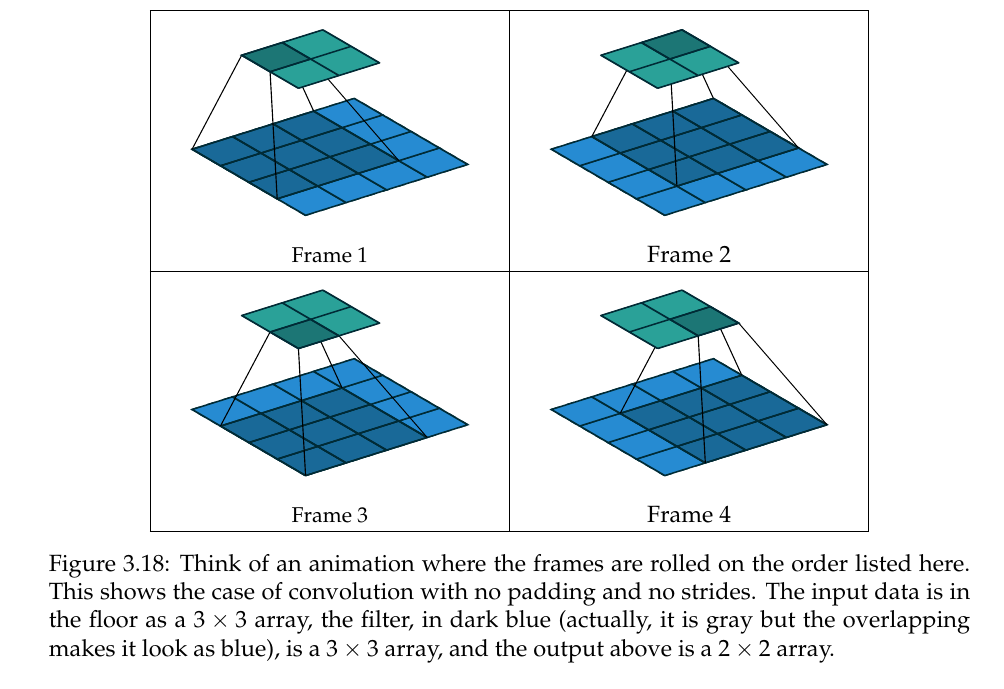

En este ejemplo tenemos los datos $x$, $4 \times 4$, el filtro $y$ es $3 \times 3$ y la salida $2 \times 2$.




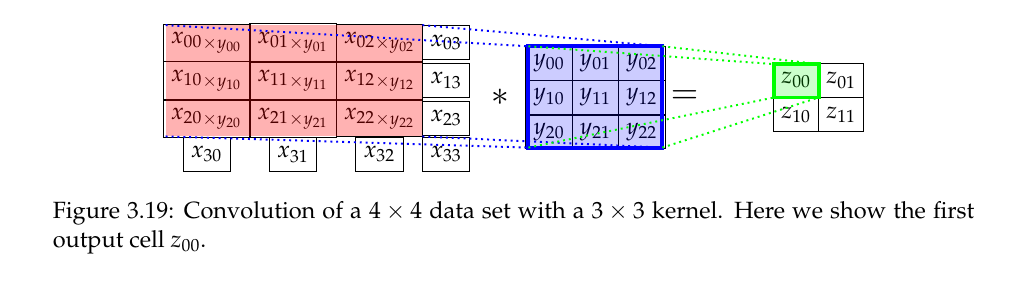

\begin{eqnarray}
z_{00} &=& x_{00} y_{00}  + x_{01} y_{01} + x_{02} y_{02} +  \\
    && x_{12}y_{10} + x_{11} y_{11} + x_{12} y_{12} \\
    && x_{20} y_{20} + x_{21} y_{21} + x_{22} y_{22}
\end{eqnarray}